# `t0err` efficiency comparison: MDC2020au vs MDC2020aw

In [24]:
sys.path.extend(["../../src/core", "../../src/utils"])
from io_manager import Load
from draw import Draw

import warnings
warnings.filterwarnings("ignore") # suppress warnings
import matplotlib.pyplot as plt

In [5]:
ana_labels = [
    "SU2020c_CRY_onspill-LH_au", 
    "SU2020c_CRY_onspill-LH_aw",
    "SU2020c_signal_onspill-LH_au",
    "SU2020c_signal_onspill-LH_aw"
]

In [6]:
results = {}
for ana_label in ana_labels:
    loader = Load(
        in_path = f"../../output/results/{ana_label}"
    )
    results[ana_label] = loader.load_pkl() 

[Load] ✅ Initialised with out_path=../../output/results/SU2020c_CRY_onspill-LH_au
[Load] ✅ Successfully loaded results from ../../output/results/SU2020c_CRY_onspill-LH_au/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/SU2020c_CRY_onspill-LH_aw
[Load] ✅ Successfully loaded results from ../../output/results/SU2020c_CRY_onspill-LH_aw/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/SU2020c_signal_onspill-LH_au
[Load] ✅ Successfully loaded results from ../../output/results/SU2020c_signal_onspill-LH_au/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/SU2020c_signal_onspill-LH_aw
[Load] ✅ Successfully loaded results from ../../output/results/SU2020c_signal_onspill-LH_aw/results.pkl


Wrote ../../output/images/comp/h10_t0err_au_aw.png


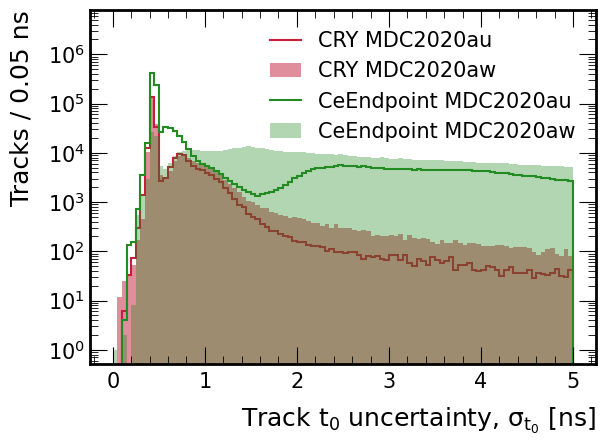

In [63]:
styles = {
    ana_labels[0] : {"color": "#C41E3A"},
    ana_labels[1] : {"color": "#C41E3A", "histtype": "bar", "alpha": 0.5},
    ana_labels[2] : {"color": "#228B22"},
    ana_labels[3] : {"color": "#228B22", "histtype": "bar", "alpha": 0.35},
}

leg_labels = {
    ana_labels[0] : "CRY MDC2020au",
    ana_labels[1] : "CRY MDC2020aw",
    ana_labels[2] : "CeEndpoint MDC2020au",
    ana_labels[3] : "CeEndpoint MDC2020aw"
}

fig, ax = plt.subplots()

for ana_label in ana_labels:
    hist_obj = results[ana_label]["hists"]["t0err"] 
    h_sel = hist_obj[{"selection": ["Preselect"]}]
     # Plot step histograms
    h_sel.plot1d(
        **styles[ana_label],
        overlay="selection", 
        ax=ax, 
        label=leg_labels[ana_label],
        flow="none"
    )

ax.set_yscale("log")
ax.legend(frameon=False) 
ax.set_ylabel("Tracks / 0.05 ns")
current_ylim = ax.get_ylim()
ax.set_ylim(current_ylim[0], current_ylim[1] * 10)
plt.tight_layout()
out_path = "../../output/images/comp/h10_t0err_au_aw.png"
plt.savefig(out_path, dpi=300)
print(f"Wrote {out_path}")
plt.show()